# Modeling Spotify Churn: A Statistical Analysis of Usage, Demographics, and Engagement
### Statistical Modelling & Simulation: Machine Project Phase 1
#### *S13 Group 6: Galicia, Mojica, Plurad, Ramirez, Tolentino*
---

## 1. Dataset Description 

### 1.1 Brief Description of the Dataset

The Spotify Analysis Dataset 2025 is a synthetic dataset centered on retaining the customers in the music streaming business. It has anonymized information on Spotify users and their demographics, account details, usage behavior, and churn (i.e., whether a user has stopped using the service). This data is especially applicable in predictive analysis, i.e. building machine learning models to determine the factors that cause user churn. It was obtained via Kaggle, which is a data science competitions and open datasets platform, and relies upon simulated or aggregated user data that approximates actual consumer behavior at Spotify. The dataset contains 12 variables that are appropriate to do the exploratory analysis and modeling. It offers insights into user interaction, subscription preferences, and churn drivers, which will assist businesses such as Spotify in bettering their customer retention strategies.



### 1.2 Data Collection Process

The Spotify Analysis Dataset 2025 is an artificial dataset generated through synthetic data generation, i.e., the user records were generated in an ideal algorithmic way so as to mimic the user behavior instead of being obtained on a real platform (Caballar, n.d.). Such an artificial approach is normally used in situations where quality and sensitive real-world data is limited because of proprietary limitations or heavy privacy laws (Dilmegani, 2025). One of the main implications is the chance of the synthetic data being devoid of the nuances and context of real-life actions, thus not being able to reproduce any complex and unique real-life situation despite maintaining the statistical nature of the context (Artificial Intelligence and the Growth of Synthetic Data, 2025) . Such dependency on simplification may lead to excessively generic information, and whatever systemic biases are inherent in the process of generative production can thus be repeated or even exaggerated in the artificial data( Jolly, 2025). Accordingly, high model accuracy in the testing phase is primarily a confirmation of the underlying statistical assumptions of the generator and cannot be regarded as a credible indication of the workability in the operational setting with real messy data (Wassel, 2024).

### 1.3 Structure of the Dataset File    

The dataset is stored in a single CSV file named spotify_churn_dataset.csv in a standard tabular format.

- Each row represents a unique Spotify user.
- Each column represents a variable describing demographic,  behavioral, or outcome-related information about the user.
- The dataset contains 8,000 observations and 12 variables.

### 1.4 Variable Description    

*The variables below will help analyze which demographic segments are most at risk of churning.*
1. User Identification and Demographics
    - user_id - Unique identifier for each user (nominal).
    - gender - Gender of the user (categorical).
    - age – Age of the user (numerical).
    - country – Country of the user (nominal).

*The variables below are essential for modeling user behavior, engagement, and predicting churn.*

2. Financial Commitment and Platform Friction
    - subscription_type – Type of Spotify account (e.g., Free, Premium, Family, Student).
    - ads_listened_per_week – Number of ads listened to per week, important for understanding friction among free users.

3. Engagement and Satisfaction
    - listening_time – Average minutes spent on the platform per day.
    - songs_played_perday – Number of songs played per day.
    - skip_rate – Percentage of songs skipped, a direct measure of dissatisfaction.
    - device_type – Primary device used (e.g., Mobile, Desktop, Web).
    - offline_listening – Usage of offline mode.
    - is_churned – Target variable indicating whether the user has churned

---

## 2. Data Preprocessing

### 2.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd

### 2.2 Load and Inspect Data

In [2]:
df = pd.read_csv("spotify_churn_dataset.csv")
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [3]:
df.tail()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0
7999,8000,Other,45,AU,Free,210,68,0.46,Desktop,6,0,0


---

### 2.3 Data Cleaning & Other Preprocessing Operations

*A. Clean multiple representations of the same categorical value.*

In [4]:
print("Gender Objects")
print(df['gender'].unique())
print()

print("Country Objects")
print(df['country'].unique())
print()

print("Subscription Type Objects")
print(df['subscription_type'].unique())
print()

print("Device Type Objects")
print(df['device_type'].unique())
print()

Gender Objects
['Female' 'Other' 'Male']

Country Objects
['CA' 'DE' 'AU' 'US' 'UK' 'IN' 'FR' 'PK']

Subscription Type Objects
['Free' 'Family' 'Premium' 'Student']

Device Type Objects
['Desktop' 'Web' 'Mobile']



**Result**: All object values are already standardized and have no spelling or capitalization inconsistencies. Therefore, no cleaning was necessary for this criterion.

Note that the succeeding parts within this segment that do not have a result cell do not necessitate cleaning.

*B. Check if the datatype of the variable is incorrect.*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


*C. Change the integer values of the columns "offline_listening" and "is_churned" to boolean "True" and "False" for better readability.*

In [6]:
df['offline_listening'] = df['offline_listening'].astype(bool)
df['is_churned'] = df['is_churned'].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   bool   
 11  is_churned             8000 non-null   bool   
dtypes: bool(2), float64(1), int64(5), object(4)
memory usage: 640.8+ KB


**Result**: All the other columns have the proper datatype. Therefore, no datatype cleaning is needed.

*D. Check if some values are set to default values of the variable.*

In [7]:
print(df['user_id'].value_counts())
print()

print(df['gender'].value_counts())
print()

print(df['age'].value_counts())
print()

print(df['country'].value_counts())
print()

print(df['subscription_type'].value_counts())
print()

print(df['songs_played_per_day'].value_counts())
print()

print(df['skip_rate'].value_counts())
print()

print(df['device_type'].value_counts())
print()

print(df['ads_listened_per_week'].value_counts())
print()

print(df['offline_listening'].value_counts())
print()

print(df['is_churned'].value_counts())
print()

user_id
1       1
2       1
3       1
4       1
5       1
       ..
7996    1
7997    1
7998    1
7999    1
8000    1
Name: count, Length: 8000, dtype: int64

gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

age
51    207
37    202
57    202
20    202
49    200
22    200
21    199
42    199
41    196
30    192
46    192
47    190
52    190
48    188
33    186
18    185
53    185
59    184
32    184
50    184
58    183
34    182
19    181
35    179
36    177
17    177
44    176
24    176
23    175
55    174
54    173
39    173
43    173
31    173
28    173
26    173
16    172
38    170
40    170
56    170
25    168
45    168
29    151
27    146
Name: count, dtype: int64

country
AU    1034
US    1032
DE    1015
IN    1011
PK     999
FR     989
UK     966
CA     954
Name: count, dtype: int64

subscription_type
Premium    2115
Free       2018
Student    1959
Family     1908
Name: count, dtype: int64

songs_played_per_day
39    102
85    100
60    100
13     9

*E. Check if there are missing data.*

In [8]:
print("\nMissing values per variable:\n")
print(df.isnull().sum())

print("\nAny missing data?:", df.isnull().values.any())


Missing values per variable:

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

Any missing data?: False


*F. Check if there are duplicate data*

In [9]:
# Check if there are any duplicate rows
duplicates_exist = df.duplicated().any()
print("Any duplicate rows?:", duplicates_exist)

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
else:
    print("\nNo duplicate rows found.")

Any duplicate rows?: False
Number of duplicate rows: 0

No duplicate rows found.


*G. Check if the formatting of the values is inconsistent.*

In [10]:
# Check for formatting inconsistencies (for text columns only)
for col in df.columns:
    dtype = df[col].dtype

    if dtype == 'object' or pd.api.types.is_string_dtype(dtype):
        inconsistent = df[col].str.strip().str.lower().nunique() != df[col].nunique()
        print(f"{col} formatting inconsistent?:", inconsistent)
    else:
        print(f"{col} formatting inconsistent?: Not applicable ({dtype})")

user_id formatting inconsistent?: Not applicable (int64)
gender formatting inconsistent?: False
age formatting inconsistent?: Not applicable (int64)
country formatting inconsistent?: False
subscription_type formatting inconsistent?: False
listening_time formatting inconsistent?: Not applicable (int64)
songs_played_per_day formatting inconsistent?: Not applicable (int64)
skip_rate formatting inconsistent?: Not applicable (float64)
device_type formatting inconsistent?: False
ads_listened_per_week formatting inconsistent?: Not applicable (int64)
offline_listening formatting inconsistent?: Not applicable (bool)
is_churned formatting inconsistent?: Not applicable (bool)


---

## 3. Exploratory Data Analysis

### 3.1 Load Additional Libraries

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import scipy.stats as st
from scipy.stats import t
from scipy.stats import chi2_contingency

plt.style.use('seaborn-v0_8')

### 3.2 EDA Proper and Visualization

*EDA Question 1: How does listening time per day vary across subscription types?*

Numerical Summary: Mean, Median, and Standard Deviation of listening_time per subscription_type

In [12]:
df.groupby('subscription_type')['listening_time'].agg(['mean', 'median','std'])

,mean,median,std
subscription_type,,,
Family,151.041405,150.0,83.858202
Free,154.997027,154.0,84.467723
Premium,155.522931,156.0,83.570249
Student,154.489025,156.0,84.172435


Notice that the difference among the spreads above are small. The visualization might be able to further capture this.

A boxplot is appropriate for this inquiry because it shows the distribution, median, and variability of listening time for each subscription type, making it easy to compare differences and spot outliers.

Visualization: Boxplot of listening_time by subscription_type

<Figure size 800x500 with 0 Axes>

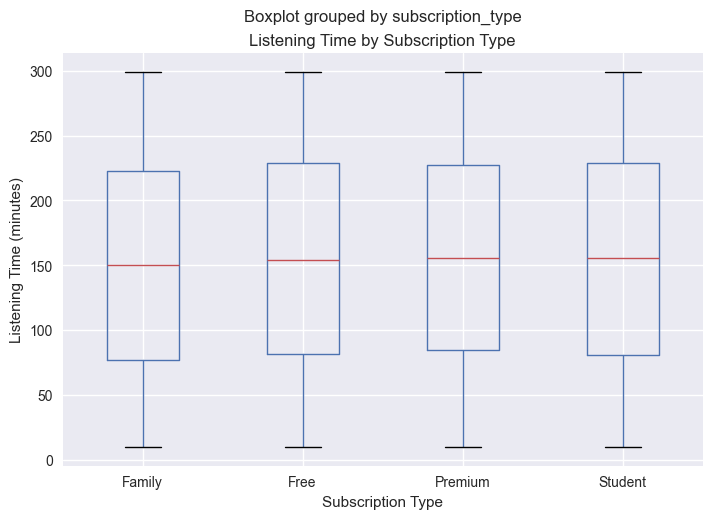

In [13]:
## Visualization: Box Plot

plt.figure(figsize=(8, 5))
df.boxplot(column='listening_time', by='subscription_type')
plt.title('Listening Time by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Listening Time (minutes)')
plt.show()


The boxplot generated indeed look similar with each other, which is indicative of the small spreads mentioned in the earlier markdown cell. Because we are comparing the average difference of four groups, it is suitable that we use ANOVA as a statistical test for the next procedure.

Statistical Test: Analysis of Variance (ANOVA)

In [14]:
family = df[df['subscription_type'] == 'Family']['listening_time']
free = df[df['subscription_type'] == 'Free']['listening_time']
premium = df[df['subscription_type'] == 'Premium']['listening_time']
student = df[df['subscription_type'] == 'Student']['listening_time']

f_stat, p_value = f_oneway(family,free,premium,student)
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
  print("\nReject the null hypothesis.")
else:
  print("\nAccept the null hypothesis.")


F-statistic: 1.1354954581789252
p-value: 0.33316329512623327

Accept the null hypothesis.


**Result**: Since p < 0.05, we accept the null hypothesis. There is no evidence to suggest that Premium users listen longer than Free or Student users.

*EDA Question 2: Does the type of Spotify subscription affect the likelihood of a user churning?*

Numerical Summary: Contingency Table between churned and non-churned users by subscription type

In [15]:
churntable = pd.crosstab(df['subscription_type'],df['is_churned'])
churntable.columns = ['Not churned', 'Churned']
print(churntable)

                   Not churned  Churned
subscription_type                      
Family                    1383      525
Free                      1515      503
Premium                   1585      530
Student                   1446      513


Premium users have the highest number of both churned and non-churned users, but churn appears relatively consistent across all subscription types, suggesting only a slight difference in churn likelihood by plan. Let us further investigate with a bar graph.

A bar graph is appropriate to use because it can clearly compare the number of churned and non-churned users across different subscription types, making differences in churn rates easy to see.

Visualization: Bar Graph of churn proportions by subscription type

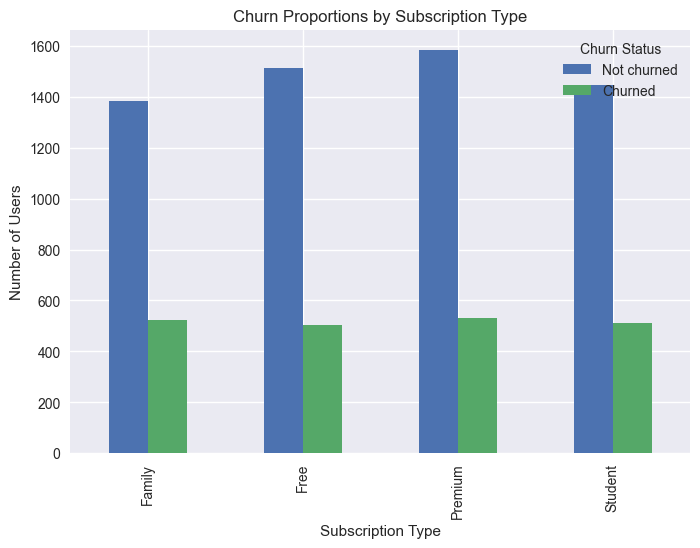

In [16]:
# Bar graph of churn proportions by subscription type

churntable.plot(kind='bar')
plt.title('Churn Proportions by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.legend(title='Churn Status')
plt.show()

The bar graph shows that all subscription types have similar churn patterns, with more users staying than leaving. Churn proportions are relatively consistent across Family, Free, Premium, and Student plans. We will use a chi-square test of independence to further test this observation.

A chi-square test is appropriate because it examines the relationship between two categorical variables, subscription type and churn status, to determine if churn likelihood depends on the type of subscription.

Statistical Test: Chi-Square Test of Independence

In [17]:
chi2, pval, dof, expected = st.chi2_contingency(churntable)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", pval)
print("\nExpected Frequencies:\n", expected)

if pval < 0.05:
  print("\nReject the null hypothesis.")
else:
  print("\nAccept the null hypothesis.")


Chi-square Statistic: 4.457518638155985
Degrees of Freedom: 3
P-value: 0.216110972429786

Expected Frequencies:
 [[1414.0665    493.9335  ]
 [1495.59025   522.40975 ]
 [1567.479375  547.520625]
 [1451.863875  507.136125]]

Accept the null hypothesis.


**Result**: Since p < 0.05, we accept the null hypothesis. There is no significant difference in listening time between different subscription types.

*EDA Question 3: Do churned users differ from active users in the number of songs they play per day?*

Numerical Summary: Count, Mean, Median, and Standard Deviation of songs_played_per_day for is_churned 

In [18]:
# Count, mean, median, and standard deviation of songs_played_per_day for is_churned = True vs False.

songsperday = df.groupby('is_churned')['songs_played_per_day'].agg(['count', 'mean', 'median', 'std'])
print(songsperday)

            count       mean  median        std
is_churned                                     
False        5929  49.970653    50.0  28.480374
True         2071  50.575567    52.0  28.364024


Churned and active users have nearly the same average number of songs played per day, suggesting little difference in listening activity between the two groups. Let us use a boxplot to visualize this difference.

A boxplot is appropriate because it visually compares the distribution, median, and spread of songs played per day between churned and active users, making differences and outliers easy to identify.

Visualization: Box Plot of songs_played_per_day by churn status

<Figure size 800x500 with 0 Axes>

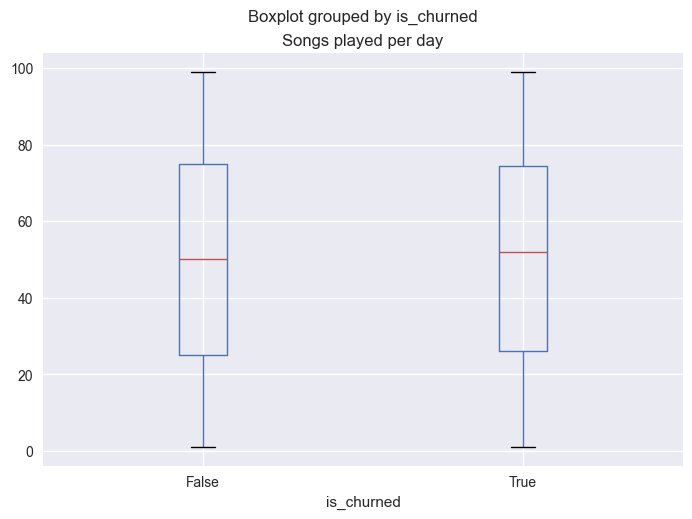

In [19]:
plt.figure(figsize=(8, 5))
df.boxplot(column='songs_played_per_day', by='is_churned')
plt.title('Songs played per day')
plt.show()

The boxplot shows that churned and active users have nearly identical distributions and medians for songs played per day, indicating minimal difference in their listening behavior.

Another suitable visualization is a histogram, as it displays the frequency distribution of songs played per day for churned and active users, allowing a clearer comparison of their overall listening patterns and data spread. Let us try if it will also capture the findings observed in the visualization above.

Visualization: Histogram

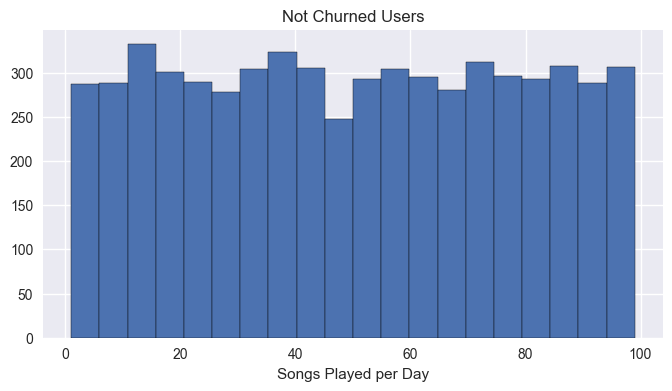

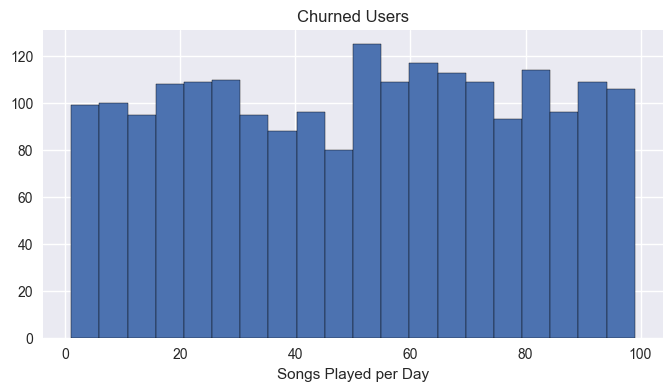

In [20]:
df[df['is_churned'] == False]['songs_played_per_day'].hist(bins=20, edgecolor='black', figsize=(8, 4))
plt.title('Not Churned Users')
plt.xlabel('Songs Played per Day')
plt.show()

df[df['is_churned'] == True]['songs_played_per_day'].hist(bins=20, edgecolor='black', figsize=(8, 4))
plt.title('Churned Users')
plt.xlabel('Songs Played per Day')
plt.show()

The histograms show that both churned and active users have a fairly uniform distribution of songs played per day, with no major differences in listening patterns between the two groups. This is similar to the findings observed in the boxplot. Let us further test these observations by a statistical test.

An unpaired t-test is appropriate because it compares the means of a continuous variable (songs played per day) between two independent groups (churned vs. not churned).

Statistical Test: Unpaired T-Test

In [21]:
## FALSE
mean1 = 49.970653
std1 = 28.480374
n1 = 5929

## TRUE
mean2 = 50.575567
std2 = 28.364024
n2 = 2071

xnull = 0

# Duplicate original df and set df to the lowest sample size 
temp_df = df.copy()
temp_df = min(n1, n2) - 1

# Set point estimate of the mean
x  = mean2 - mean1

# t-statistic

## standard error
se = np.sqrt((std1**2/n1) + (std2**2/n2))
tstat = (x - xnull)/se
print(f"t-statistic = {tstat:.4f}")

# example: 0.05 significance level (two-tailed) and 100 degrees of freedom
alpha = 0.05

tcrit = t.ppf(1 - alpha/2, temp_df)
print(f"Critical t-value: {tcrit:.4f}")

if tstat > tcrit:
  print("\nReject the null hypothesis.")
else:
  print("\nAccept the null hypothesis.")

t-statistic = 0.8346
Critical t-value: 1.9611

Accept the null hypothesis.


Alternative: P-Values

In [22]:
## ALTERNATIVE: Using/Comparing p-values

p_onetail = 1 - t.cdf(tstat, temp_df)

print(f"p-value (one-tail): {p_onetail:.4f}")

if p_onetail < 0.05:
  print("\nReject the null hypothesis")
else:
  print("\nAccept the null hypothesis")

p-value (one-tail): 0.2020

Accept the null hypothesis


**Result**: Based on the tests, there is no statistically significant difference in songs played per day between churned and non-churned users.

*EDA Question 4: Is skip rate different across age groups?*

Numerical Summary: Create age groups (e.g., <25, 25–34, 35–44, 45+) then report Count, Mean, Median, and Standard Deviation of skip_rate per age group

In [23]:
# Define the age group ranges (bins) and their corresponding labels
bins = [0, 24, 34, 44, float('inf')]        
labels = ['<25', '25–34', '35–44', '45+']    

# Create a temporary series that categorizes each age into its corresponding group
age_groups = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Group the data by age_groups (the temporary series) and compute summary statistics for skip_rate
age_summary = df.groupby(age_groups, observed=True)['skip_rate'].agg(['count', 'mean', 'median', 'std'])

# Display the summary table
age_summary

,count,mean,median,std
age,,,,
<25,1667,0.305765,0.3,0.172358
25–34,1728,0.299595,0.3,0.171463
35–44,1815,0.299229,0.3,0.176348
45+,2790,0.297674,0.3,0.173856


Average skip rates are nearly identical across all age groups, indicating that age has little effect on how often users skip songs.

A boxplot is appropriate for this question because it shows the distribution, median, and spread of skip rates for each age group, making it easy to compare differences and spot variations or outliers across groups.

Visualization: Boxplot of skip_rate by age group

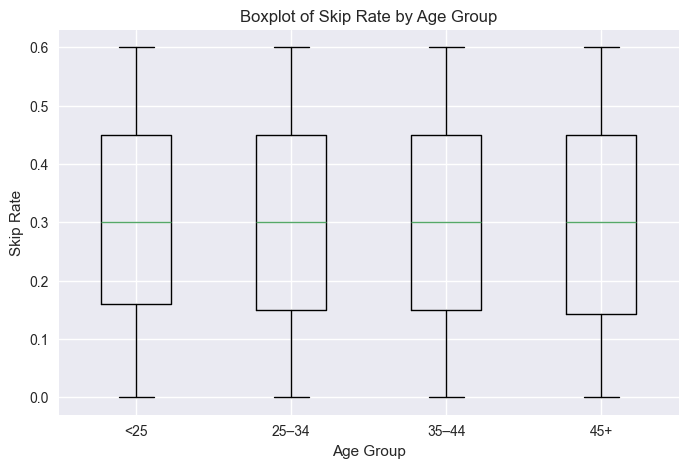

In [24]:
plt.figure(figsize=(8, 5))
plt.boxplot([df.loc[age_groups == label, 'skip_rate'] for label in age_groups.cat.categories],tick_labels=age_groups.cat.categories)

plt.xlabel('Age Group')
plt.ylabel('Skip Rate')
plt.title('Boxplot of Skip Rate by Age Group')
plt.show()

The boxplot shows that skip rate distributions are nearly identical across all age groups, with similar medians and variability, suggesting minimal difference in skipping behavior by age.

ANOVA is an appropriate test for this because it tests whether the mean skip rates differ significantly among more than two independent age groups, determining if age influences skipping behavior.

Statistical Test: Analysis of Variance (ANOVA)

In [25]:
# Separate skip_rate values by age group
age_under25 = df.loc[age_groups == '<25', 'skip_rate']
age_25_34 = df.loc[age_groups == '25–34', 'skip_rate']
age_35_44 = df.loc[age_groups == '35–44', 'skip_rate']
age_45plus = df.loc[age_groups == '45+', 'skip_rate']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(age_under25, age_25_34, age_35_44, age_45plus)

# Print results
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Decision rule
if p_value < 0.05:
    print("\nReject the null hypothesis.")
else:
    print("\nAccept the null hypothesis.")

F-statistic: 0.7933744039027895
p-value: 0.49738385770378535

Accept the null hypothesis.


**Result**: Since p > 0.05, we fail to reject the null hypothesis. There is no significant difference in skip rates across the different age groups.

*EDA Question 5: Does offline listening behavior differ between churned and active users?*

Numerical Summary: Contingency Table and Proportions of offline_listening by is_churned

In [26]:
# Create contingency table (counts)
contingency_table = pd.crosstab(df['is_churned'], df['offline_listening'])

# Display contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
offline_listening  False  True 
is_churned                     
False               1515   4414
True                 503   1568


Both churned and active users show similar offline listening patterns, with most users in both groups using offline listening. The difference between groups appears small. Now let us see the proportions.

In [27]:
# Calculate proportions (row-wise)
proportions = pd.crosstab(df['is_churned'], df['offline_listening'], normalize='index')

# Display proportions
print("\nProportions (within each churn group):")
print(proportions)


Proportions (within each churn group):
offline_listening     False     True 
is_churned                           
False              0.255524  0.744476
True               0.242878  0.757122


Proportions show that both churned and active users have similar offline listening behavior, around 3/4 of users in each group listen offline, indicating minimal difference between them.

A bar graph is appropriate for this question because it visually compares proportions of offline and online listeners between churned and active users, making it easy to see differences or similarities in their listening habits.

Visualization: Bar Graph

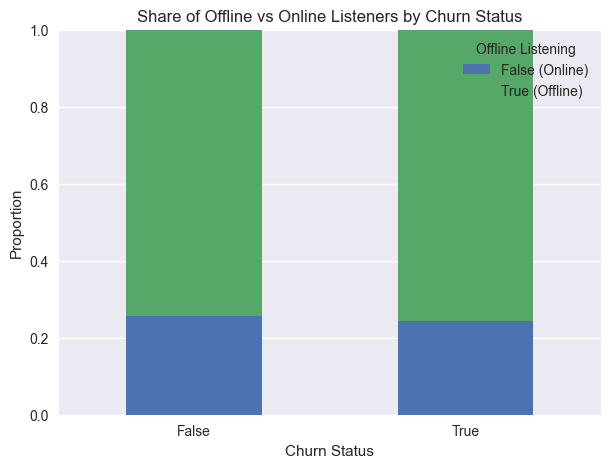

In [28]:
# Build a contingency table of proportions
proportions = pd.crosstab(df['is_churned'], df['offline_listening'], normalize='index')

# Create the stacked bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(7, 5))

# Title and axis labels for clarity
ax.set_title('Share of Offline vs Online Listeners by Churn Status')
ax.set_xlabel('Churn Status') # x-axis label
ax.set_ylabel('Proportion') # y-axis label (proportions 0 → 1)

# Fix x-tick rotation so labels are horizontal and easier to read
plt.xticks(rotation=0)

# Update legend to show which column is which (False = Online, True = Offline)
ax.legend(title='Offline Listening', labels=['False (Online)', 'True (Offline)'])
ax.set_ylim(0, 1)

# Show the plot
plt.show()

The bar graph shows that both churned and active users have similar proportions of offline and online listeners, indicating little difference in listening behavior between the two groups.

The chi-square test of independence is appropriate for this inquiry because it evaluates whether there is a significant association between two categorical variables, churn status and offline listening, to determine if offline listening behavior is related to user churn.

Statistical Test: Chi-Square Test of Independence

In [29]:
# Create the contingency table (raw counts)
# Rows: is_churned (False/True)
# Columns: offline_listening (False/True)
contingency_table = pd.crosstab(df['is_churned'], df['offline_listening'])

# Perform the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Display the expected frequencies (what counts would look like if independent)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# 5) Interpret the result
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis.")
else:
    print("\nAccept the null hypothesis.")

Chi-square Statistic: 1.2351292752394203
Degrees of Freedom: 1
P-value: 0.26641183030820925

Expected Frequencies:
offline_listening       False       True 
is_churned                               
False              1495.59025  4433.40975
True                522.40975  1548.59025

Accept the null hypothesis.


**Result**: Since p > 0.05, we fail to reject the null hypothesis. There is no significant relationship between offline listening behavior and churn status.

---

## 4. Research Question

### *What is the relationship between a user's skip_rate and the likelihood of customer churn?*

The relationship between a user's skip_rate and the likelihood of customer churn (is_churned) is a crucial area for investigation because it 
directly connects a measure of user experience to the project's target outcome. 

This research question arises from the EDA because the initial exploratory analysis failed to find statistically significant relationships between churn and other features like subscription type, songs played per day, or offline listening. Although the group's EDA confirmed that skip_rate did not significantly differ across age groups, this negative finding necessitates moving forward to test the variable directly against the outcome variable to isolate its predictive powe

The variable skip_rate is defined as the percentage of songs skipped, which is explicitly categorized as a "direct measure of dissatisfaction". 
While previous analyses of variables such as listening_time and songs_played_per_day did not reveal significant differences, skip_rate stands out 
as a potential driver of churn. Investigating its relationship with is_churned sets up a binary classification problem, directly supporting the 
project’s goal of modeling user behavior to predict churn. 

Furthermore, answering this question prepares the project for future segments by establishing a foundation for data modelling and 
statistical inference ensuring that subsequent analyses are focused on variables that are most relevant to understanding and mitigating customer churn.

---

## 5. Appendix

### 5.1 References

Caballar, R. (n.d.). Synthetic Data. IBM. https://www.ibm.com/think/topics/synthetic-data

Dilmegani, C. (2025, September 26). Top 20+ Synthetic Data use cases. AIMultiple. https://research.aimultiple.com/synthetic-data-use-cases/ 

Artificial intelligence and the growth of synthetic data. (2025, October 15). World Economic Forum. https://www.weforum.org/stories/2025/10/ai-synthetic-data-strong-governance/ 

Jolly, K. (2025, January 8). Everything you should know about synthetic data in 2025. Daffodil Unthinkable Software Corp. https://insights.daffodilsw.com/blog/everything-you-should-know-about-synthetic-data-in-2025 

Wassel, B. (2024, November 11). How synthetic data might shape consumer research. CX Dive. https://www.customerexperiencedive.com/news/synthetic-data-consumer-research-customer-journey-qualtrics/732408/ 

---

# Modeling Spotify Churn: A Statistical Analysis of Usage, Demographics, and Engagement
### Statistical Modelling & Simulation: Machine Project Phase 2
#### *S13 Group 6: Galicia, Mojica, Plurad, Ramirez, Tolentino*


---

## 1. Data Modelling

### 1.1 Modelling the Relationship Between Skip Rate and Churn

In the first phase of the project, we learned that the relationship between a user's skip_rate and the likelihood of customer churn (is_churned) is a crucial area for investigation because it directly connects a measure of user experience to the project's target outcome. This led us to the research question at hand:

### *What is the relationship between a user’s skip_rate and the likelihood of customer churn (is_churned)?*

This section of the project will focus on exploring and expounding this research question through the appropriate techniques and concepts covered in class.

### 1.2 Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kmeans import KMeans
from rule_miner import RuleMiner
from mlxtend.preprocessing import TransactionEncoder

%load_ext autoreload
%autoreload 2

df = pd.read_csv("spotify_churn_dataset.csv")

print("Shape:", df.shape)
display(df.head())

print("\nColumn info:")
print(df.dtypes)

Shape: (8000, 12)


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1



Column info:
user_id                    int64
gender                    object
age                        int64
country                   object
subscription_type         object
listening_time             int64
songs_played_per_day       int64
skip_rate                float64
device_type               object
ads_listened_per_week      int64
offline_listening          int64
is_churned                 int64
dtype: object


### 1.3 Data Preprocessing for Modelling

In [31]:
# is_churned column changed to boolean
if df["is_churned"].dtype == "object":
    df["is_churned"] = (
        df["is_churned"]
        .astype(str)
        .str.strip()
        .str.lower()
        .isin(["yes", "true", "1", "churned"])
    )
else:
    # if already 0/1 or bool, convert to bool
    df["is_churned"] = df["is_churned"].astype(bool)
    
# drops null values
df = df.dropna(subset=["skip_rate", "listening_time", "songs_played_per_day", "ads_listened_per_week"])

### 1.4 Clustering: Grouping Users by Listening Behaviour

Prepare the dataset for clustering analysis by selecting relevant features that may influence user behavior and churn.

In [32]:
# select columns for clustering
cluster_df = df[[
    "listening_time",
    "songs_played_per_day",
    "skip_rate",
    "ads_listened_per_week"
]].copy()

cluster_df.head()
cluster_df.shape

(8000, 4)

Performs K-Means clustering on cluster_df with k=3 clusters.

In [33]:
# Kmeans
k = 3
start_var = 0       
end_var = 4         
n_obs = cluster_df.shape[0]

kmeans_spotify = KMeans(k, start_var, end_var, n_obs, cluster_df)

centroids = kmeans_spotify.initialize_centroids(cluster_df)
centroids.round(2)

print("Initial centroids:")
print(centroids.round(2))

Initial centroids:
   listening_time  songs_played_per_day  skip_rate  ads_listened_per_week
0           248.0                  92.0       0.18                   35.0
1            10.0                   1.0       0.56                    0.0
2           108.0                  89.0       0.09                   49.0


Trains the K-Means model on cluster_df for up to 300 iterations.

In [34]:
max_iters = 300  

spotify_clusters = kmeans_spotify.train(cluster_df, max_iters)

print("Cluster counts:")
for c in range(k):
    print(f"Cluster {c}: {(spotify_clusters == c).sum()} users")

df["cluster"] = spotify_clusters.values 
df.head()

Cluster counts:
Cluster 0: 2723 users
Cluster 1: 2642 users
Cluster 2: 2635 users


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,cluster
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,True,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,False,2
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,True,2
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,False,1
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,True,0


Display scatter plot of Spotify users showing skip_rate vs listening_time, color-coded by cluster. Cluster centroids are overlaid as black stars (*) to visualize the cluster centers.

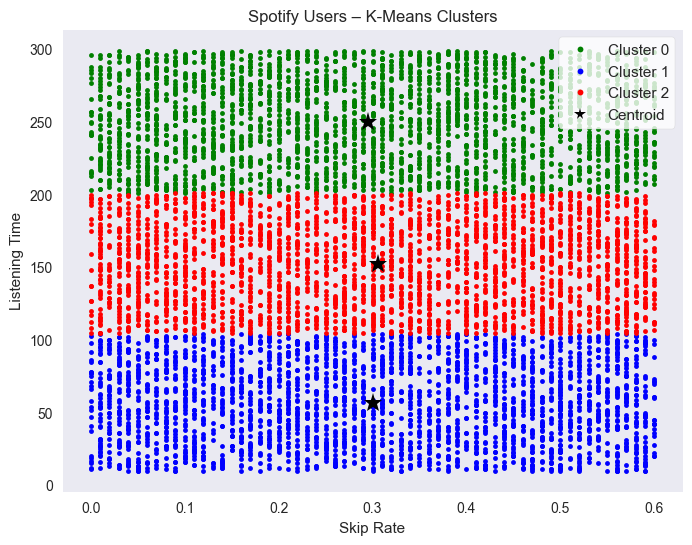

In [35]:
plt.figure(figsize=(8, 6))

colors = ['g.', 'b.', 'r.']

# plot clusters
for c in range(k):
    subset = df[df["cluster"] == c]
    plt.plot(
        subset["skip_rate"],
        subset["listening_time"],
        colors[c],
        label=f"Cluster {c}"
    )

# ---- FIX: separate centroid legend marker vs plot marker ----

# 1. Add INVISIBLE centroid marker just for the legend (small size)
plt.plot([], [], 'k*', ms=7, label="Centroid")

# 2. Plot the REAL centroids (big & visible)
for i in range(len(kmeans_spotify.centroids)):
    cx = kmeans_spotify.centroids.iloc[i]["skip_rate"]
    cy = kmeans_spotify.centroids.iloc[i]["listening_time"]
    plt.plot(cx, cy, 'k*', ms=14)   # bigger so visible on graph

# --------------------------------------------------------------

plt.xlabel("Skip Rate")
plt.ylabel("Listening Time")
plt.title("Spotify Users – K-Means Clusters")

plt.legend(markerscale=1.2, fontsize=11, frameon=True, facecolor="white")
plt.grid()
plt.show()


Calculates and visualizes the churn rate for each cluster.

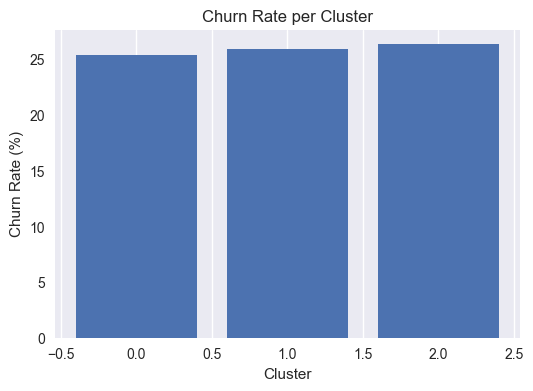

In [36]:
# churn rate per cluster
cluster_churn = df.groupby("cluster")["is_churned"].mean().reset_index()
cluster_churn["churn_rate_%"] = cluster_churn["is_churned"] * 100
cluster_churn

plt.figure(figsize=(6, 4))
plt.bar(cluster_churn["cluster"], cluster_churn["churn_rate_%"])
plt.xlabel("Cluster")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate per Cluster")
plt.grid(axis="y")
plt.show()

### 1.5 Association Rule Mining: Understanding how skip rate relates to churn within each cluster

Prepares the data for association rule mining (ARM) within each cluster

In [37]:
cluster_rules = {}  # store rules per cluster

for c in df['cluster'].unique():
    cluster_df_arm = df[df['cluster'] == c].copy()
    
    # Binning skip_rate within this cluster
    cluster_df_arm['skip_rate_bin_fixed'] = pd.cut(
        cluster_df_arm['skip_rate'],
        bins=[0, 0.2, 1.0],
        labels=["low_skip", "higher_skip"]
    )
    
    # Convert churn boolean to label
    cluster_df_arm['churn_label'] = cluster_df_arm['is_churned'].map({True: "churn_yes", False: "churn_no"})
    
    # Drop any rows with missing bin
    cluster_df_arm = cluster_df_arm.dropna(subset=['skip_rate_bin_fixed', 'churn_label'])
    
    # Prepare transactions, convert everything to string
    transactions = cluster_df_arm.apply(
        lambda row: [str(row['skip_rate_bin_fixed']), str(row['churn_label'])],
        axis=1
    ).tolist()
    
    # One-hot encode
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    arm_ohe = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Store for next step
    cluster_rules[c] = arm_ohe

Displays a summary of each cluster.

In [38]:
print("Cluster summaries:\n")
for c in sorted(df['cluster'].unique()):
    cluster_size = len(df[df['cluster'] == c])
    avg_skip = df[df['cluster'] == c]['skip_rate'].mean()
    churn_rate = df[df['cluster'] == c]['is_churned'].mean() * 100

    print(f"Cluster {c}:")
    print(f"  Number of users: {cluster_size}")
    print(f"  Average skip rate: {avg_skip:.2f}")
    print(f"  Churn rate: {churn_rate:.2f}%\n")


Cluster summaries:

Cluster 0:
  Number of users: 2723
  Average skip rate: 0.29
  Churn rate: 25.38%

Cluster 1:
  Number of users: 2642
  Average skip rate: 0.30
  Churn rate: 25.97%

Cluster 2:
  Number of users: 2635
  Average skip rate: 0.31
  Churn rate: 26.34%



Generates all association rules from the one-hot encoded dataset (arm_ohe_fixed) using the RuleMiner class with a minimum support and confidence threshold

In [39]:
# Generate and display all unique association rules
# Initialize RuleMiner
support_threshold = max(1, int(0.005 * len(arm_ohe)))  # 0.5% of dataset
confidence_threshold = 0.1
rule_miner = RuleMiner(support_t=support_threshold, confidence_t=confidence_threshold)

# Generate all association rules
all_rules = rule_miner.get_association_rules(arm_ohe)

# Remove duplicates
seen = set()
unique_rules = []
for rule in all_rules:
    hashable_rule = (tuple(rule[0]), tuple(rule[1]))
    if hashable_rule not in seen:
        seen.add(hashable_rule)
        unique_rules.append(rule)

# Display all unique rules
print(f"Total unique rules: {len(unique_rules)}")
display(unique_rules)

Total unique rules: 8


[(['churn_no'], ['higher_skip'], 1318, 0.6540942928039702),
 (['higher_skip'], ['churn_no'], 1318, 0.7484383872799546),
 (['churn_no'], ['low_skip'], 697, 0.34590570719602975),
 (['low_skip'], ['churn_no'], 697, 0.7414893617021276),
 (['churn_yes'], ['higher_skip'], 443, 0.6457725947521866),
 (['higher_skip'], ['churn_yes'], 443, 0.2515616127200454),
 (['churn_yes'], ['low_skip'], 243, 0.35422740524781343),
 (['low_skip'], ['churn_yes'], 243, 0.25851063829787235)]

Filters the association rules generated to focus only on patterns where skip rate bins (low_skip or higher_skip) are the antecedents and churn labels (churn_yes or churn_no) are the consequents.

In [40]:
# Define skip rate bins
skip_bins = ["low_skip", "higher_skip"]

# Filter rules where skip_rate is antecedent and churn_label is consequent
skip_to_churn_rules = [
    rule for rule in unique_rules
    if any(item in skip_bins for item in rule[0])  # antecedent contains skip_rate bin
    and any("churn" in item for item in rule[1])   # consequent contains churn label
]

# Display filtered rules
print("Filtered skip_rate → churn rules (no duplicates):")
display(skip_to_churn_rules)

print("Total filtered rules:", len(skip_to_churn_rules))

Filtered skip_rate → churn rules (no duplicates):


[(['higher_skip'], ['churn_no'], 1318, 0.7484383872799546),
 (['low_skip'], ['churn_no'], 697, 0.7414893617021276),
 (['higher_skip'], ['churn_yes'], 443, 0.2515616127200454),
 (['low_skip'], ['churn_yes'], 243, 0.25851063829787235)]

Total filtered rules: 4


Generates cluster-specific skip rate → churn association rules.

In [41]:
cluster_association_rules = {}
confidence_threshold = 0.1  # 10% confidence

for c, arm_ohe in cluster_rules.items():
    # Initialize RuleMiner with support=1 (catch all)
    rule_miner = RuleMiner(support_t=1, confidence_t=confidence_threshold)
    rules = rule_miner.get_association_rules(arm_ohe)

    # Detect skip bins and churn labels in the one-hot columns
    skip_bins = [col for col in arm_ohe.columns if "skip" in col]
    churn_cols = [col for col in arm_ohe.columns if "churn" in col]

    # Filter rules: skip_rate → churn
    skip_to_churn = [
        rule for rule in rules
        if any(item in skip_bins for item in rule[0])
        and any(item in churn_cols for item in rule[1])
    ]

    # Remove duplicates 
    unique_rules = []
    seen = set()
    for rule in skip_to_churn:
        hashable_rule = (tuple(rule[0]), tuple(rule[1]))
        if hashable_rule not in seen:
            seen.add(hashable_rule)
            unique_rules.append(rule)

    cluster_association_rules[c] = unique_rules

for c in sorted(cluster_association_rules.keys()):
    rules = cluster_association_rules[c]
    print(f"\nCluster {c} rules (skip_rate → churn):")
    if rules:
        display(rules)
    else:
        print("No rules found.")


Cluster 0 rules (skip_rate → churn):


[(['higher_skip'], ['churn_no'], 1318, 0.7484383872799546),
 (['low_skip'], ['churn_no'], 697, 0.7414893617021276),
 (['higher_skip'], ['churn_yes'], 443, 0.2515616127200454),
 (['low_skip'], ['churn_yes'], 243, 0.25851063829787235)]


Cluster 1 rules (skip_rate → churn):


[(['higher_skip'], ['churn_no'], 1274, 0.7309236947791165),
 (['low_skip'], ['churn_no'], 660, 0.7551487414187643),
 (['higher_skip'], ['churn_yes'], 469, 0.26907630522088355),
 (['low_skip'], ['churn_yes'], 214, 0.2448512585812357)]


Cluster 2 rules (skip_rate → churn):


[(['higher_skip'], ['churn_no'], 1303, 0.7378255945639864),
 (['low_skip'], ['churn_no'], 626, 0.7373380447585395),
 (['higher_skip'], ['churn_yes'], 463, 0.2621744054360136),
 (['low_skip'], ['churn_yes'], 223, 0.2626619552414605)]

Computes basic metrics for each cluster’s skip rate → churn rules.

In [42]:
cluster_rule_metrics = {}

for c, rules in cluster_association_rules.items():
    if rules:
        metrics = []
        for rule in rules:
            X, Y = rule[0], rule[1]
            support_XY = cluster_rules[c].loc[:, X + Y].all(axis=1).sum() / len(cluster_rules[c])
            support_X = cluster_rules[c].loc[:, X].all(axis=1).sum() / len(cluster_rules[c])
            confidence = support_XY / support_X if support_X > 0 else 0
            metrics.append({
                'antecedent': X,
                'consequent': Y,
                'support': support_XY,
                'confidence': confidence
            })
        cluster_rule_metrics[c] = pd.DataFrame(metrics)

Stores all metrics in a list of dictionaries per cluster

In [43]:
cluster_rule_metrics = {}  # store metrics per cluster

for c, rules in cluster_association_rules.items():
    metrics_list = []

    if rules:
        for rule in rules:
            X, Y = rule[0], rule[1]

            # Support(X ∪ Y)
            support_XY = cluster_rules[c].loc[:, X + Y].all(axis=1).sum() / len(cluster_rules[c])

            # Support(X) and Support(Y)
            support_X = cluster_rules[c].loc[:, X].all(axis=1).sum() / len(cluster_rules[c])
            support_Y = cluster_rules[c].loc[:, Y].all(axis=1).sum() / len(cluster_rules[c])

            # Confidence
            confidence = support_XY / support_X if support_X > 0 else 0

            # Lift
            lift = confidence / support_Y if support_Y > 0 else 0

            # Leverage
            leverage = support_XY - (support_X * support_Y)

            # Store all metrics with rule
            metrics_list.append({
                "rule": f"{' & '.join(X)} → {' & '.join(Y)}",
                "support": support_XY,
                "confidence": confidence,
                "lift": lift,
                "leverage": leverage
            })
    cluster_rule_metrics[c] = metrics_list

for c in sorted(df['cluster'].unique()):
    metrics_list = cluster_rule_metrics.get(c, [])  # get metrics or empty list if not present
    if metrics_list:
        print(f"\nCluster {c} rule metrics:")
        display(pd.DataFrame(metrics_list))
    else:
        print(f"\nCluster {c} has no rule metrics.")


Cluster 0 rule metrics:


,rule,support,confidence,lift,leverage
0,higher_skip → churn_no,0.487967,0.748438,1.003242,0.001577
1,low_skip → churn_no,0.258053,0.741489,0.993927,-0.001577
2,higher_skip → churn_yes,0.164013,0.251562,0.990478,-0.001577
3,low_skip → churn_yes,0.089967,0.258511,1.017839,0.001577



Cluster 1 rule metrics:


,rule,support,confidence,lift,leverage
0,higher_skip → churn_no,0.486817,0.730924,0.989052,-0.005388
1,low_skip → churn_no,0.252197,0.755149,1.021833,0.005388
2,higher_skip → churn_yes,0.179213,0.269076,1.031000,0.005388
3,low_skip → churn_yes,0.081773,0.244851,0.938178,-0.005388



Cluster 2 rule metrics:


,rule,support,confidence,lift,leverage
0,higher_skip → churn_no,0.498279,0.737826,1.000215,0.000107
1,low_skip → churn_no,0.239388,0.737338,0.999554,-0.000107
2,higher_skip → churn_yes,0.177055,0.262174,0.999397,-0.000107
3,low_skip → churn_yes,0.085277,0.262662,1.001255,0.000107


Visualizes the skip rate → churn association rules for each cluster using a horizontal bar chart.

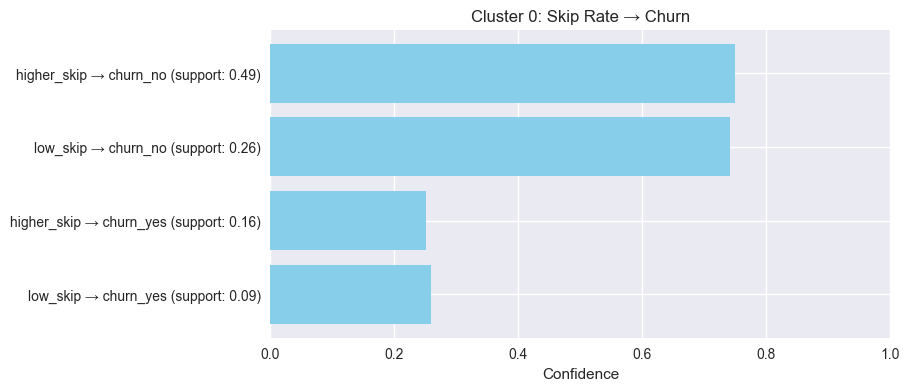

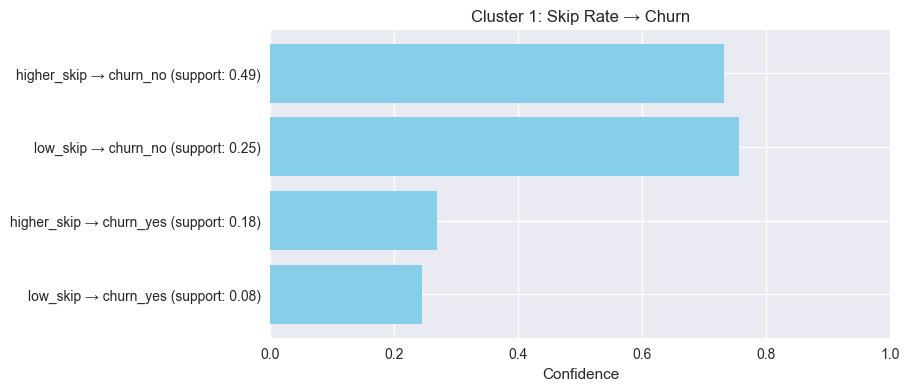

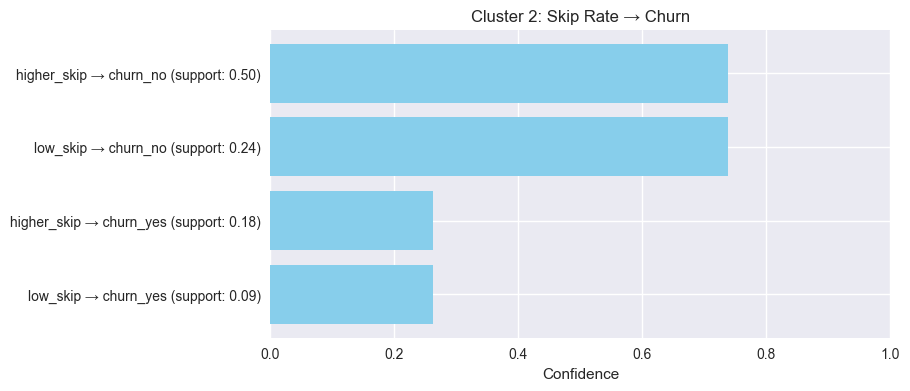

In [44]:
for c in sorted(cluster_rule_metrics.keys()):
    df_rules = pd.DataFrame(cluster_rule_metrics[c]) 

    if not df_rules.empty:
        rule_labels = [
            f"{row['rule']} (support: {row['support']:.2f})"
            for _, row in df_rules.iterrows()
        ]
        confidences = df_rules['confidence'].tolist()

        # Plot horizontal bar chart
        plt.figure(figsize=(8, 4))
        plt.barh(rule_labels, confidences, color='skyblue')
        plt.xlabel("Confidence")
        plt.title(f"Cluster {c}: Skip Rate → Churn")
        plt.xlim(0, 1)
        plt.gca().invert_yaxis()  # highest confidence on top
        plt.show()
    else:
        print(f"Cluster {c} has no skip_rate → churn rules.")

Visualizes the strength of association between skip rate and churn using lift instead of confidence.

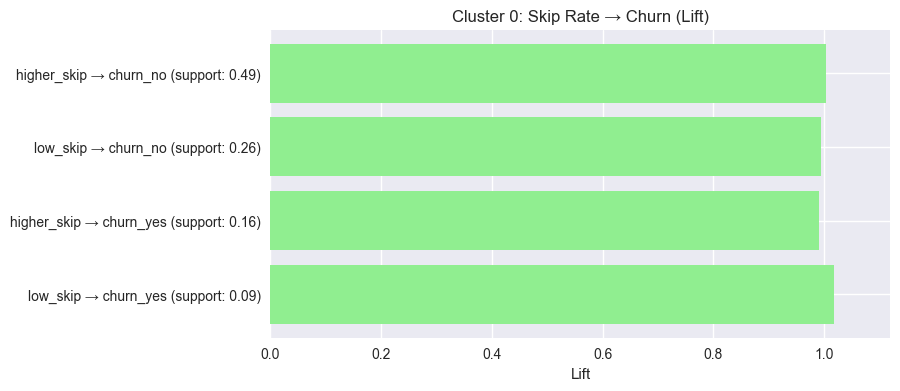

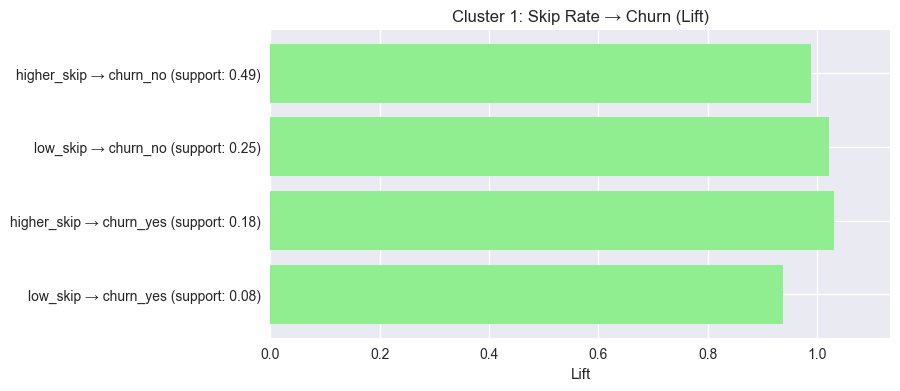

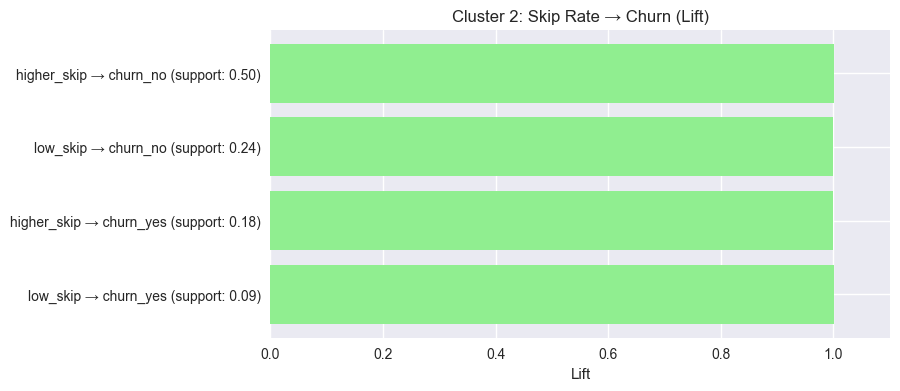

In [45]:
for c in sorted(cluster_rule_metrics.keys()):
    df_rules = pd.DataFrame(cluster_rule_metrics[c])  

    if not df_rules.empty:
        rule_labels = [
            f"{row['rule']} (support: {row['support']:.2f})"
            for _, row in df_rules.iterrows()
        ]
        lifts = df_rules['lift'].tolist()  # use lift as bar length

        # Plot horizontal bar chart
        plt.figure(figsize=(8, 4))
        plt.barh(rule_labels, lifts, color='lightgreen')
        plt.xlabel("Lift")
        plt.title(f"Cluster {c}: Skip Rate → Churn (Lift)")
        plt.xlim(0, max(lifts) * 1.1)  
        plt.gca().invert_yaxis() 
        plt.show()
    else:
        print(f"Cluster {c} has no skip_rate → churn rules to plot with lift.")

---

## 2. Statistical Inference

### 2.1 Research Question

In Phase 1 we explored association rules and binned `skip_rate` to find rules of the type `skip_* -> churn_*`. Phase 2 formally tests whether `skip_rate` differs between churned and non-churned users and whether categorical skip behavior is associated with churn.

Association Rule Mining: attempted to uncover rules of the form skip_* → churn_*, but produced weak or sparse rules. This indicates that skip-related behaviors do not form strong categorical patterns leading directly to churn. Because ARM is sensitive to discretization and support thresholds, its inconclusive result suggests that a more rigorous, continuous-variable statistical approach is necessary to confirm whether skip_rate truly relates to churn.

KMeans Clustering: clustering segmented users based on multiple behavioral features, but skip_rate did not emerge as a dominant driver separating churned from non-churned users. While some clusters displayed higher average skip behavior alongside elevated churn rates, the clustering model did not provide statistical evidence of a meaningful difference—only descriptive patterns.

Together, these modeling observations justify the need for statistical inference. Modeling alone cannot establish significance; therefore, hypothesis testing is required to formally determine whether skip_rate differs between churn groups and whether any observed differences are statistically reliable rather than incidental.

### 2.2 Hypotheses

**Mean comparison tests (t-test, z-test, ANOVA)**

- **H₀:** μ_skip_rate(churn = 1) = μ_skip_rate(churn = 0)  
- **H₁:** μ_skip_rate(churn = 1) ≠ μ_skip_rate(churn = 0)

**Chi-square test (categorical association)**

- **H₀:** skip_rate category is independent of churn  
- **H₁:** skip_rate category is associated with churn

**Significance level:** α = 0.05

### 2.3 Preprocessing Steps

In [56]:
# Cell: Imports and data load
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest as ztest_mean
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import levene

# Load only the columns we need for Phase 2
df = pd.read_csv("spotify_churn_dataset.csv")
print("Loaded dataset shape:", df.shape)
print("Columns:", list(df.columns))

# Preview
display(df[['skip_rate','is_churned']].head())

Loaded dataset shape: (8000, 12)
Columns: ['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']


,skip_rate,is_churned
0,0.20,1
1,0.34,0
2,0.04,1
3,0.31,0
4,0.36,1


In [47]:
# Cell: Preprocessing (explicit steps shown)
# 1) Check for the presence of required columns
required_cols = ['skip_rate','is_churned']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Required column '{c}' not found in dataset")

# 2) Handle types and missing values
# Convert is_churned to numeric 0/1 if needed
if df['is_churned'].dtype == 'bool':
    df['is_churned'] = df['is_churned'].astype(int)
elif df['is_churned'].dtype == object:
    # common mappings (adjust if your notebook uses different labels)
    map_dict = {'yes':1,'no':0,'True':1,'False':0}
    df['is_churned'] = df['is_churned'].map(map_dict).fillna(df['is_churned'])
    if df['is_churned'].dtype == object:
        df['is_churned'] = pd.to_numeric(df['is_churned'], errors='coerce')

before_n = df.shape[0]
# Drop rows missing either variable
df = df.dropna(subset=['skip_rate','is_churned']).copy()
after_n = df.shape[0]
print(f"Dropped {before_n-after_n} rows with missing skip_rate or is_churned. Remaining rows: {after_n}")

# 3) Ensure skip_rate scale is 0-1 (proportion)
# If max > 1, assume percentage (0-100) and convert
sr_max = df['skip_rate'].astype(float).max()
print("skip_rate max value:", sr_max)
if sr_max > 1.0:
    print("Converting skip_rate from percentage (0-100) to proportion (0-1).")
    df['skip_rate'] = df['skip_rate'].astype(float) / 100.0
else:
    df['skip_rate'] = df['skip_rate'].astype(float)

# 4) Create the two groups for testing
group_non = df[df['is_churned'] == 0]['skip_rate'].reset_index(drop=True)
group_churn = df[df['is_churned'] == 1]['skip_rate'].reset_index(drop=True)
n0, n1 = len(group_non), len(group_churn)
print(f"n_non_churn = {n0}, n_churn = {n1}")
print("Mean skip_rate (non-churn) = {:.6f}".format(group_non.mean()))
print("Mean skip_rate (churn)     = {:.6f}".format(group_churn.mean()))


Dropped 0 rows with missing skip_rate or is_churned. Remaining rows: 8000
skip_rate max value: 0.6
n_non_churn = 5929, n_churn = 2071
Mean skip_rate (non-churn) = 0.298474
Mean skip_rate (churn)     = 0.304862


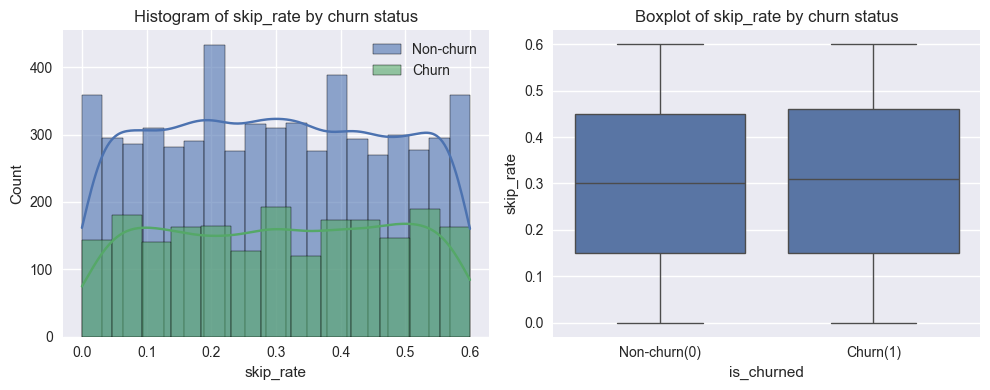

In [48]:
# Cell: Visual checks (useful for report)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(group_non, kde=True, label='Non-churn', alpha=0.6)
sns.histplot(group_churn, kde=True, label='Churn', alpha=0.6)
plt.legend()
plt.title('Histogram of skip_rate by churn status')

plt.subplot(1,2,2)
sns.boxplot(x='is_churned', y='skip_rate', data=df)
plt.xticks([0,1], ['Non-churn(0)', 'Churn(1)'])
plt.title('Boxplot of skip_rate by churn status')
plt.tight_layout()
plt.show()


In [49]:
# Cell: Assumptions & variance checks
alpha = 0.05
# Normality: Shapiro (note: Shapiro sensitive for large n; if n>5000 we may skip or sample)
shap_p0 = None
shap_p1 = None
try:
    if n0 <= 5000:
        shap_p0 = stats.shapiro(group_non.sample(min(n0,5000), random_state=1))[1]
    if n1 <= 5000:
        shap_p1 = stats.shapiro(group_churn.sample(min(n1,5000), random_state=1))[1]
except Exception as e:
    print("Shapiro test skipped/error:", e)

print("Approx Shapiro p-values (non-churn, churn):", shap_p0, shap_p1)

# Levene's test for equality of variances (robust)
levene_stat, levene_p = stats.levene(group_non, group_churn, center='median')
print("Levene test: stat={:.4f}, p={:.4e}".format(levene_stat, levene_p))
equal_var = (levene_p >= alpha)
print("Assume equal variances for t-test?" , equal_var)


Approx Shapiro p-values (non-churn, churn): None 1.408665895161061e-25
Levene test: stat=0.5074, p=4.7627e-01
Assume equal variances for t-test? True


### 2.4 Inference Proper

*A. Z-Test for Difference in Mean Skip Rates (Large-Sample Robustness Check)*

In [50]:
# Cell: z-test (large-sample approx for difference in means)
# This is a robustness check: with large samples z-test should be similar to t-test.
try:
    z_stat, z_p = ztest_mean(group_churn, group_non, alternative='two-sided', usevar='unequal')
    print("Z-test (two-sided): z = {:.6f}, p = {:.6e}".format(z_stat, z_p))
    if z_p < alpha:
        print("Result: Reject H0 (z-test).")
    else:
        print("Result: Fail to reject H0 (z-test).")
except Exception as e:
    print("Z-test not performed:", e)

Z-test (two-sided): z = 1.438017, p = 1.504293e-01
Result: Fail to reject H0 (z-test).


*B. Two-Sample t-Test for Difference in Mean Skip Rates*

In [51]:
# Cell: Two-sample t-test (means comparison)
t_stat, t_p = stats.ttest_ind(group_churn, group_non, equal_var=equal_var, nan_policy='omit')
print("Two-sample t-test (two-sided):")
print("H0: mean(skip_rate | churn=1) == mean(skip_rate | churn=0)")
print("t-statistic = {:.6f}, p-value = {:.6e}, alpha = {:.2f}".format(t_stat, t_p, alpha))
if t_p < alpha:
    print("Result: Reject H0 (significant difference in means).")
else:
    print("Result: Fail to reject H0 (no significant difference in means).")


Two-sample t-test (two-sided):
H0: mean(skip_rate | churn=1) == mean(skip_rate | churn=0)
t-statistic = 1.441943, p-value = 1.493577e-01, alpha = 0.05
Result: Fail to reject H0 (no significant difference in means).


*C. Two-Sample t-Test: Testing Whether Mean Skip Rates Differ Between Churn Groups*

In [52]:
# Cell: Chi-square test (after binning skip_rate into terciles)
# This tests association between categorical skip behavior and churn.
df['skip_cat'] = pd.qcut(df['skip_rate'], q=3, labels=['low','mid','high'])
contingency = pd.crosstab(df['skip_cat'], df['is_churned'])
chi2_stat, chi2_p, chi2_dof, chi2_expected = stats.chi2_contingency(contingency)
print("Chi-square test (skip_cat vs is_churned):")
print("Contingency table:\n", contingency)
print("chi2 = {:.6f}, p-value = {:.6e}, dof = {}".format(chi2_stat, chi2_p, chi2_dof))
if chi2_p < alpha:
    print("Result: Reject H0 — skip_rate category associated with churn.")
else:
    print("Result: Fail to reject H0 — no association detected.")


Chi-square test (skip_cat vs is_churned):
Contingency table:
 is_churned     0    1
skip_cat             
low         2034  696
mid         1996  676
high        1899  699
chi2 = 2.104229, p-value = 3.491986e-01, dof = 2
Result: Fail to reject H0 — no association detected.


D. *One-way ANOVA: skip_rate across churn groups*

In [63]:
# Cell: One-way ANOVA (skip_rate by churn group)
# This formally tests whether the mean skip_rate differs between churned and non-churned users.
# Equivalent to a two-sample t-test with two groups; generalizes if more groups were present.
anova_F, anova_p = stats.f_oneway(group_non, group_churn)
print("One-way ANOVA F-statistic: {:.4f}".format(anova_F))
print("One-way ANOVA p-value: {:.4e}".format(anova_p))
if anova_p < alpha:
    print("Result: Reject H0 — mean skip_rate differs between churn groups.")
else:
    print("Result: Fail to reject H0 — no significant mean difference detected.")


One-way ANOVA F-statistic: 2.0792
One-way ANOVA p-value: 1.4936e-01
Result: Fail to reject H0 — no significant mean difference detected.


 E. *Test of Variances: Comparing Skip Rate Variance Between Churn Groups*

In [64]:
# Cell: Tests of variance equality (Levene's and F-test)
# These tests determine whether skip_rate variance is equal between churned and non-churned groups.
# Levene's test is robust to non-normality; the F-test ratio directly compares variances.
levene_stat, levene_p = stats.levene(group_non, group_churn, center='median')
var_non = group_non.var(ddof=1)
var_churn = group_churn.var(ddof=1)
f_ratio = var_non / var_churn
print("Levene test: stat={:.4f}, p={:.4e}".format(levene_stat, levene_p))
if levene_p < alpha:
    print("Result: Reject H0 — variances significantly differ.")
else:
    print("Result: Fail to reject H0 — no significant variance difference detected.")
print("F-test variance ratio: {:.4f}".format(f_ratio))
print("Variance (non-churn): {:.6f}".format(var_non))
print("Variance (churn): {:.6f}".format(var_churn))


Levene test: stat=0.5074, p=4.7627e-01
Result: Fail to reject H0 — no significant variance difference detected.
F-test variance ratio: 0.9888
Variance (non-churn): 0.030042
Variance (churn): 0.030384
